In [1]:
import mlflow
import pickle
import sys
sys.path.insert(1, '../library')
import database_helper
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2024-09-02 18:52:56.652446: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-02 18:52:56.652820: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 18:52:56.654563: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-02 18:52:56.659733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-02 18:52:56.668100: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [2]:
os.environ["MLFLOW_TRACKING_USERNAME"] = "user"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
#mlflow.set_tracking_uri(uri="http://mlflow.local:80")
#mlflow.set_experiment("Multi-Output Time Series Forecast")
#mlflow.autolog()

In [3]:
with open('selected_columns.pkl', 'rb') as f:
    selected_columns = pickle.load(f)

strings_to_exclude = ['icon', 'moon', 'warning']
selected_columns = [item for item in selected_columns if not any(substring in item for substring in strings_to_exclude)]

strings_to_include = ['days_0', '10838']
selected_columns = [item for item in selected_columns if all(substring in item for substring in strings_to_include)]

print(str(len(selected_columns)) + ' Features selected')
df = database_helper.query_data(field_list=selected_columns)

9 Features selected
Executing Query 1 from 2024-07-28 12:00:00 to 2024-08-02 12:00:00
(43191, 17)
Executing Query 2 from 2024-08-02 12:00:00 to 2024-08-07 12:00:00
(43181, 17)
Executing Query 3 from 2024-08-07 12:00:00 to 2024-08-12 12:00:00
(43198, 17)
Executing Query 4 from 2024-08-12 12:00:00 to 2024-08-17 12:00:00
(43191, 17)
Executing Query 5 from 2024-08-17 12:00:00 to 2024-08-22 12:00:00
(43193, 17)
Executing Query 6 from 2024-08-22 12:00:00 to 2024-08-27 12:00:00
(43169, 17)
Executing Query 7 from 2024-08-27 12:00:00 to 2024-09-01 12:00:00
(43198, 17)
Executing Query 8 from 2024-09-01 12:00:00 to 2024-09-02 16:52:57
(10391, 17)


In [4]:
df.set_index('_time', inplace=True)
df = df.select_dtypes(include='float64')
df.interpolate(inplace=True)
df = df.resample('h').mean()
df.reset_index(inplace=True)
date_time = pd.to_datetime(df.pop('_time'), format='%d.%m.%Y %H:%M:%S')

display(df)
display(date_time)

,10838_days_0_precipitation,10838_days_0_sunrise,10838_days_0_sunset,10838_days_0_sunshine,10838_days_0_temperatureMax,10838_days_0_temperatureMin,10838_days_0_windDirection,10838_days_0_windGust,10838_days_0_windSpeed
0,59.000000,1.722139e+12,1.722193e+12,4610.000000,229.0,174.000000,3210.0,241.000000,93.0
1,59.000000,1.722139e+12,1.722193e+12,4610.000000,229.0,174.000000,3210.0,241.000000,93.0
2,59.000000,1.722139e+12,1.722193e+12,4610.000000,229.0,174.000000,3210.0,241.000000,93.0
3,59.000000,1.722139e+12,1.722193e+12,4610.000000,229.0,174.000000,3210.0,241.000000,93.0
4,60.338889,1.722139e+12,1.722193e+12,4598.416667,229.0,172.547222,3210.0,226.713889,93.0
...,...,...,...,...,...,...,...,...,...
864,12.000000,1.725252e+12,1.725300e+12,3730.000000,250.0,161.000000,2060.0,241.000000,74.0
865,12.000000,1.725252e+12,1.725300e+12,3730.000000,250.0,161.000000,2060.0,241.000000,74.0
866,12.000000,1.725252e+12,1.725300e+12,3730.000000,250.0,161.000000,2060.0,241.000000,74.0
867,12.000000,1.725252e+12,1.725300e+12,3730.000000,250.0,161.000000,2060.0,241.000000,74.0


0     2024-07-28 12:00:00+00:00
1     2024-07-28 13:00:00+00:00
2     2024-07-28 14:00:00+00:00
3     2024-07-28 15:00:00+00:00
4     2024-07-28 16:00:00+00:00
                 ...           
864   2024-09-02 12:00:00+00:00
865   2024-09-02 13:00:00+00:00
866   2024-09-02 14:00:00+00:00
867   2024-09-02 15:00:00+00:00
868   2024-09-02 16:00:00+00:00
Name: _time, Length: 869, dtype: datetime64[ns, UTC]

Text(0.5, 1.0, 'Time of day signal')

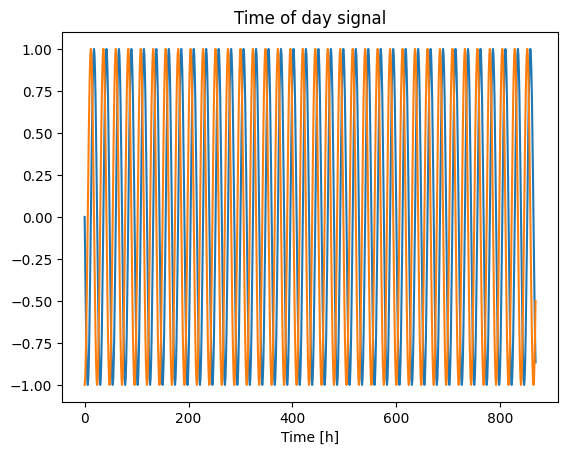

In [5]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
plt.plot(np.array(df['Day sin'])[:])
plt.plot(np.array(df['Day cos'])[:])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [6]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [7]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [8]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}
    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [9]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [10]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)
  ds = ds.map(self.split_window)
  return ds

WindowGenerator.make_dataset = make_dataset

In [11]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [12]:
five_days = 43200
one_day = 8640
wide_window = WindowGenerator(input_width=five_days, label_width=five_days, shift=one_day)

five_days = 24
one_day = 1
wide_window = WindowGenerator(input_width=five_days, label_width=five_days, shift=one_day)


In [13]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=5):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
  model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(), metrics=[tf.keras.metrics.MeanAbsoluteError()])
  history = model.fit(window.train, epochs=MAX_EPOCHS, validation_data=window.val, callbacks=[early_stopping])
  return history, model

In [14]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)
    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [15]:
print(wide_window.test_df.shape)
print(wide_window.train_df.shape)
print(wide_window.val_df.shape)

(87, 13)
(608, 13)
(174, 13)


In [16]:
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros()
        )
]))

history, model = compile_and_fit(residual_lstm, wide_window)

val_performance = {}
performance = {}
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val, return_dict=True)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0, return_dict=True)



Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0495 - mean_absolute_error: 0.0724 - val_loss: 0.0585 - val_mean_absolute_error: 0.0803
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0450 - mean_absolute_error: 0.0739 - val_loss: 0.0556 - val_mean_absolute_error: 0.0780
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0397 - mean_absolute_error: 0.0639 - val_loss: 0.0525 - val_mean_absolute_error: 0.0711
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0369 - mean_absolute_error: 0.0596 - val_loss: 0.0515 - val_mean_absolute_error: 0.0730
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0368 - mean_absolute_error: 0.0612 - val_loss: 0.0519 - val_mean_absolute_error: 0.0746
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0359 - mean_absolute_error: 0.0615 - val_loss: 0.0523 - val_mean_absolute_error: 0.0756
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 - mean_absolute_error: 0.0614 - val_loss: 0.053

In [17]:
input_data_df = wide_window.test_df[:24]
true_data_df = wide_window.test_df[24:48]
true_data_df.reset_index(drop=True, inplace=True)

input_data = np.reshape(input_data_df, (1, 24, 13))
predictions = model.predict(input_data)
predictions_df = pd.DataFrame(predictions[0])
predictions_df.columns = true_data_df.columns

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


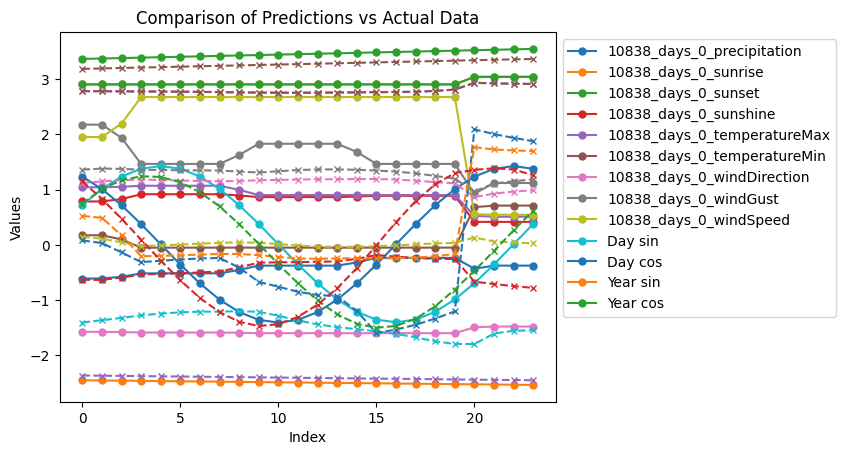

In [18]:
fig, ax = plt.subplots()
true_data_df.plot(ax=ax, marker='o', linestyle='-', markersize=5, title="Comparison of Predictions vs Actual Data")
predictions_df.plot(ax=ax, marker='x', linestyle='--', markersize=5)
ax.set_xlabel("Index")
ax.set_ylabel("Values")
ax.legend(true_data_df.columns,loc='upper left', bbox_to_anchor=(1, 1))
plt.show()